# This code is used to answer subquestions 2 and 4

## Visualizations of subquestion 2

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("Dataframes_Pickles/full_top_2000_audio_features.csv", header=0, index_col=[0])


def data_dict_generator():
    #Initialize empty dict
    data_dict = {}
    for i in range(1999, 2019):
        #Subset dataframe; for example only take rows where pos1999 is not 0 (So song is in top 2000 of 1999)
        sub_df = df[df[f'pos{i}'] != 0]
        #Calculate means, add as dictionary.

        data_dict[f'pos{i}'] = {'acousticness' : sub_df['acousticness'].mean(),
                                'danceability':sub_df['danceability'].mean(),
                                'duration_ms':sub_df['duration_ms'].mean(),
                                'energy':sub_df['energy'].mean(),
                                'instrumentalness':sub_df['instrumentalness'].mean(),
                                'loudness':sub_df['loudness'].mean(),
                                'speechiness':sub_df['speechiness'].mean(),
                                'valence':sub_df['valence'].mean() ,
                                'year':sub_df["year"].mean(),
                                'tempo':sub_df['tempo'].mean(),
                                'liveness':sub_df['liveness'].mean()}
    #Nested dict
    return data_dict

average_data = data_dict_generator()


def data_plotter(internal_feature):
    year_range = np.arange(1999, 2019, dtype=np.int)
    
    track_feat_list = []
    if internal_feature == "duration_ms":
        for i in range(1999, 2019):
            track_feat_list.append(average_data[f'pos{i}'][f'{internal_feature}']/60000)
    else:
        for i in range(1999, 2019):
            track_feat_list.append(average_data[f'pos{i}'][f'{internal_feature}'])
    print("Max change of {}:\t\t{}".format(internal_feature, max(track_feat_list)-min(track_feat_list)))
#     plt.plot(year_range, track_feat_list, '-o')
#     plt.title(f'{internal_feature} in top2000 over the years')
#     plt.xscale('linear')
#     plt.xlabel("Year")
#     plt.ylabel(f"{internal_feature}")
#     plt.xscale("linear")
#     plt.xticks(np.arange(1999, 2019, step=2))
#     plt.show()

In [2]:
# TABLE ... in the r
for track_feat in average_data['pos1999']:
    data_plotter(track_feat)

Max change of acousticness:		0.08905024133000006
Max change of danceability:		0.02091619999999972
Max change of duration_ms:		0.5570259416666672
Max change of energy:		0.05694344999999945
Max change of instrumentalness:		0.007191301680000033
Max change of loudness:		1.200525500000028
Max change of speechiness:		0.006195600000000023
Max change of valence:		0.09869365000000008
Max change of year:		13.579999999999927
Max change of tempo:		3.543919500000513
Max change of liveness:		0.004798750000000601


### plot a colorized grid of change over year graphs
the code in the function gridplot() is based on: https://python-graph-gallery.com/125-small-multiples-for-line-chart/

In [3]:
# Create a list with everything BUT the track features
drop_list = []
for feat in df.columns[:len(df.columns)-10]:
    if feat!="year":
        drop_list.append(feat)

col_feature = df.drop(drop_list, axis=1)

# Create a dict of all the specific features, with their corresponding list of mean values of each year
def create_feat_dict():
    track_feat_dict = {}
    for column in col_feature:
        track_feat_list = []
        for i in range(1999, 2019):
            if column=="duration_ms":
                track_feat_list.append(average_data[f'pos{i}'][f'{column}']/60000)
            else: track_feat_list.append(average_data[f'pos{i}'][f'{column}'])
        track_feat_dict[column]=track_feat_list
    return track_feat_dict

track_feat_dict = create_feat_dict()

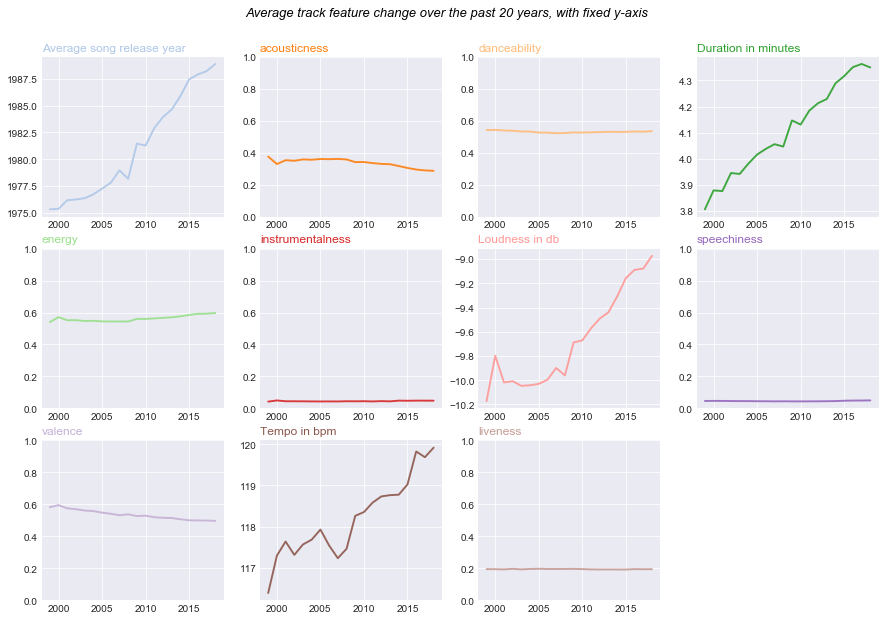

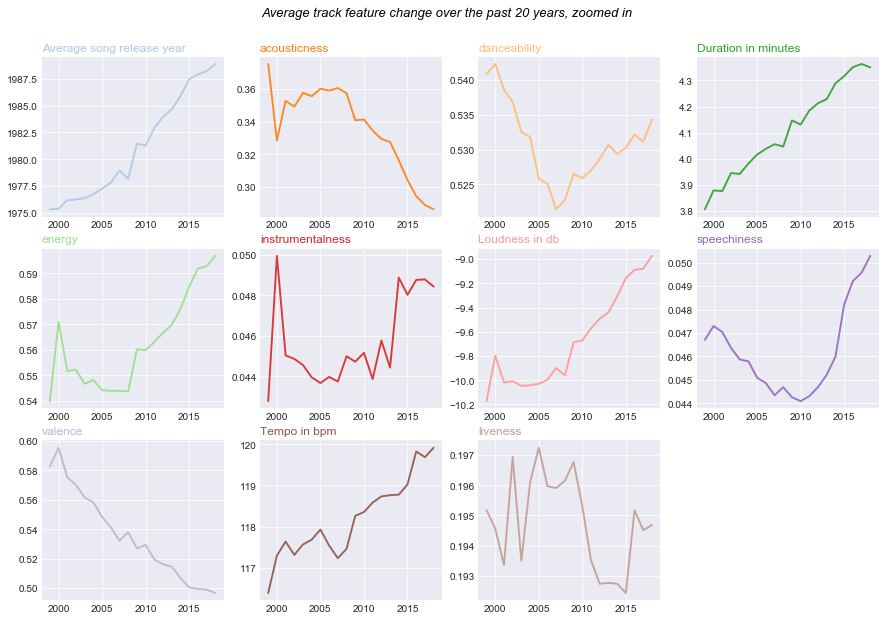

In [4]:
# This function creates a colorized gridplot. 
# Arguments taken: y-lim (boolean, if True, then the y-lim is set to 0,1)
# ignorelim (list that ignores the y-lim rule)
# title (string for the title of the entire gridplot)
# col_lis (list of all the different y-axis variables)
# plt_layout (tuple, defines the grid size)
# datadict (dictionary with the data that needs to be plotted. key=y-axis var label, value=corresponding data)
def gridplot(ylim=True, ignorelim=[], title="", col_lis=[], plt_layout=(), datadict={}):
    # Initialize the figure
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(15,10))

    # create a color palette
    palette = plt.get_cmap('tab20')


    # Create a np array of the years
    year_range = np.arange(1999, 2019, dtype=np.int)

    # multiple line plot
    num=0
    for column in col_lis:
        num+=1

        # Find the right spot on the plot
        plt.subplot(plt_layout[0],plt_layout[1], num)


        # Plot the lineplot
        plt.plot(year_range, datadict[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

        # Same fixed limits if ylim is set to true
        if ylim and column not in ignorelim and column != 'tempo':
            plt.ylim(0,1)
            

        # Not ticks everywhere
        if num in range(7) : plt.tick_params(labelbottom='off')
        if num not in [1,4,7] : plt.tick_params(labelleft='off')

        # Add title
        if column == 'duration_ms': plt.title(f'Duration in minutes', loc='left', fontsize=12, fontweight=0, color=palette(num))
        elif column == 'year': plt.title(f"Average song release year", loc='left', fontsize=12, fontweight=0, color=palette(num))
        elif column == 'loudness': plt.title(f"Loudness in db", loc='left', fontsize=12, fontweight=0, color=palette(num))
        elif column == 'tempo': plt.title(f"Tempo in bpm", loc='left', fontsize=12, fontweight=0, color=palette(num))
        else: plt.title(f'{column}', loc='left', fontsize=12, fontweight=0, color=palette(num))

    # general title
    plt.suptitle(title, fontsize=13, fontweight=0, color='black', style='italic', y=0.95)

    # Axis title
    # plt.text(0.5, 0.04, 'Year', ha='center', va='center')
    # plt.text(0.06, 0.5, 'Feature value', ha='center', va='center', rotation='vertical')
    plt.savefig(f'Plots/{title}.png', bbox_inches='tight')
    plt.show()
    
title1 ="Average track feature change over the past 20 years, with fixed y-axis"
title2 = "Average track feature change over the past 20 years, zoomed in"
ignorelim = ['year', 'duration_ms', 'loudness']

# FIGURE... in the report. It shows the average feature change over the years
gridplot(title=title1, ignorelim=ignorelim, col_lis=col_feature, datadict=track_feat_dict, plt_layout=(3,4))
gridplot(ylim=False, title=title2, ignorelim=ignorelim, col_lis=col_feature, datadict=track_feat_dict, plt_layout=(3,4))

In [5]:
# Transform dict to dataframe for easy csv export for STATA
average_data = pd.DataFrame(average_data)

# Transpose columns and rows and export to csv
average_data = average_data.transpose()
average_data.to_csv('STATA Stuff/stata_data.csv')

In [7]:
average_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence,year,tempo,liveness
pos1999,0.375287,0.540846,228369.1395,0.539919,0.042769,-10.173540,0.046713,0.582559,1975.3130,116.377914,0.195174
pos2000,0.328383,0.542313,232721.6170,0.570997,0.049960,-9.798571,0.047297,0.595286,1975.3570,117.290330,0.194567
pos2001,0.352637,0.538615,232559.5545,0.551763,0.045032,-10.018763,0.047040,0.575207,1976.1645,117.633530,0.193363
pos2002,0.349118,0.536842,236715.1050,0.552228,0.044860,-10.008360,0.046368,0.569917,1976.2350,117.307730,0.196931
pos2003,0.357614,0.532526,236501.1405,0.546713,0.044556,-10.046883,0.045873,0.561437,1976.3535,117.563041,0.193505


## Subquestion 4: Plotting the genre changes over the years

In [8]:
import pickle
from collections import Counter

with open('Dataframes_Pickles/genre_data_list.pkl', 'rb') as f4:
    genre_list = pickle.load(f4)
df['genre'] = genre_list


#This function returns a counter object for each year in the top2000
def genre_dict_generator(df_param):
    data_dict = {}
    for i in range(1999, 2019):
        flat_list = []
        #Subset dataframe; for example only take rows where pos1999 is not 0 (So song is in top 2000 of 1999)
        sub_df = df_param[df_param[f'pos{i}'] != 0]
        genre_list_in = list(sub_df['genre'])
        for sublist in genre_list_in:
            if sublist != 0:
                for item in sublist:
                    flat_list.append(item)
        counter = Counter(flat_list)
        data_dict[f'pos{i}'] = counter
    return data_dict


genre_dictionary = genre_dict_generator(df)

#Aggregate sub-genres into big genres. We do this for rock, jazz, hiphop, pop, and dance. We also consider
# the genres beatlesque and mellow gold seperately.
rock_list = ['rock', 'classic rock', 'art rock', 'blues rock',
             'album rock', 'alternative rock', 'belgian rock',
             'dutch rock', 'folk rock',
             'folk rock', 'yacht rock', 'glam rock',
             'hard rock', 'heartland rock', 'irish rock',
             'modern rock', 'permanent wave', 'progressive rock',
             'psychedelic rock', 'pub rock', 'rock-and-roll', 'soft rock', 'symphonic rock']

jazz_list = ['jazz funk', 'jazz', 'jazz blues', 'jazz fusion',
             'jazz pop', 'jazz rock', 'jazz trombone',
             'new orleans jazz', 'soul jazz', 'vocal jazz']

hiphop_list = ['rap', 'hip hop', 'alternative hip hop',
               'gangster rap', 'southern hip hop']

pop_list = ['art pop', 'baroque pop', 'brill building pop'
            'bubblegum pop', 'dutch pop', 'europop', 'french pop',
            'nederpop', 'new wave pop', 'sophisti pop', 'sunshine pop',
            'swedish pop', 'synth pop']

dance_list = ['freak beat', 'hip house', 'pop dance', 'progressive house', 'tropical house', 'eurodance'
              'australian dance', 'bubblegum dance', 'dutch trance', 'edm', 'electro', 'electro house']


#Function that counts the number of times a genre is present in a top2000 for every year we considered.
def genre_per_year_counter(genre_dict_year_param):
    total_rock_occurence, total_jazz_occurence, total_hiphop_occurence, \
    total_pop_occurence, total_dance_occurence, total_beatlesque_occurence, \
    total_mellow_gold_occurence = [] , [], [], [] , [], [], []
    for year in range(1999, 2019):
        year_dict = genre_dict_year_param[f'pos{year}']
        rock_counter ,jazz_counter ,hiphop_counter ,pop_counter, \
        dance_counter, beatlesque_counter ,mellow_gold_counter = 0, 0, 0, 0, 0, 0, 0

        for rock_genre in rock_list:
            rock_counter += year_dict[f'{rock_genre}']
        for jazz_genre in jazz_list:
            jazz_counter += year_dict[f'{jazz_genre}']
        for hiphop_genre in hiphop_list:
            hiphop_counter += year_dict[f'{hiphop_genre}']
        for pop_genre in pop_list:
            pop_counter += year_dict[f'{pop_genre}']
        for dance_genre in dance_list:
            dance_counter += year_dict[f'{dance_genre}']
        beatlesque_counter += year_dict['beatlesque']
        mellow_gold_counter += year_dict['mellow gold']

        total_rock_occurence.append(rock_counter)
        total_jazz_occurence.append(jazz_counter)
        total_hiphop_occurence.append(hiphop_counter)
        total_pop_occurence.append(pop_counter)
        total_dance_occurence.append(dance_counter)
        total_beatlesque_occurence.append(beatlesque_counter)
        total_mellow_gold_occurence.append(mellow_gold_counter)
    return total_rock_occurence, total_jazz_occurence,\
            total_hiphop_occurence, total_pop_occurence, total_dance_occurence, \
            total_beatlesque_occurence, total_mellow_gold_occurence

#Calling the function
ttal_rock_occurence, ttal_jazz_occurence, \
ttal_hiphop_occurence, ttal_pop_occurence, ttal_dance_occurence, \
ttal_beatlesque_occurence, ttal_mellow_gold_occurence  = genre_per_year_counter(genre_dictionary)

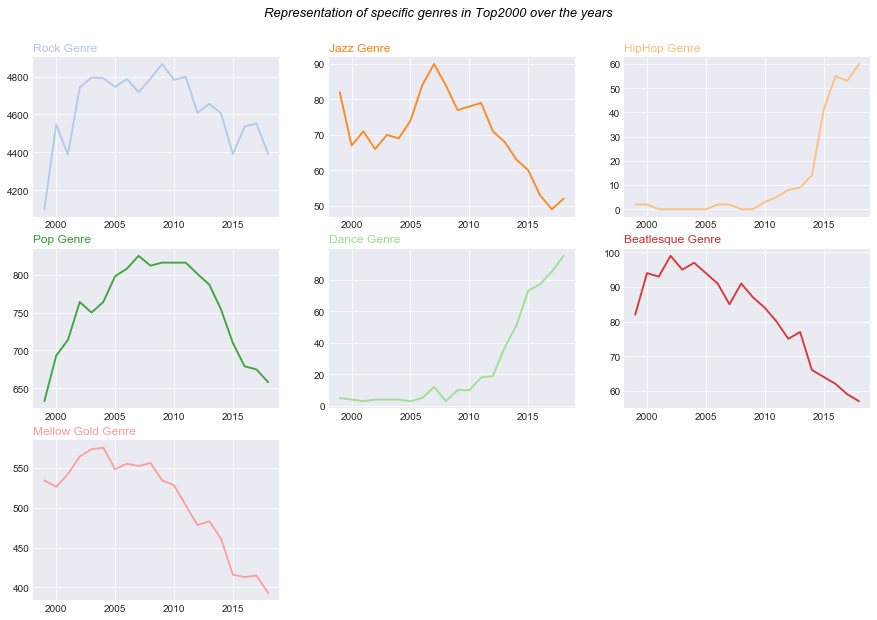

In [9]:
col_genres = ['Rock Genre','Jazz Genre', 'HipHop Genre','Pop Genre','Dance Genre','Beatlesque Genre','Mellow Gold Genre']

genre_plot_dict = {}
genre_plot_dict ['Rock Genre'] = ttal_rock_occurence
genre_plot_dict ['Jazz Genre'] = ttal_jazz_occurence
genre_plot_dict ['HipHop Genre'] = ttal_hiphop_occurence
genre_plot_dict ['Pop Genre'] = ttal_pop_occurence
genre_plot_dict ['Dance Genre'] = ttal_dance_occurence
genre_plot_dict ['Beatlesque Genre'] = ttal_beatlesque_occurence
genre_plot_dict ['Mellow Gold Genre'] = ttal_mellow_gold_occurence

title3= 'Representation of specific genres in Top2000 over the years'

# TABLE ... in the report.
gridplot(ylim=False, title=title3, ignorelim=ignorelim, col_lis=col_genres, datadict=genre_plot_dict, plt_layout=(3,3))